# Netflix Customer Base Analysis

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
# Data Loading:
df = pd.read_csv(r"C:\Users\nihmath\Desktop\SQL\Datasets\Netflix Userbase.csv")

In [8]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [11]:
# Checking for Duplicate values :

df.duplicated().sum()

0

In [13]:
# Checking for missing values :

df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

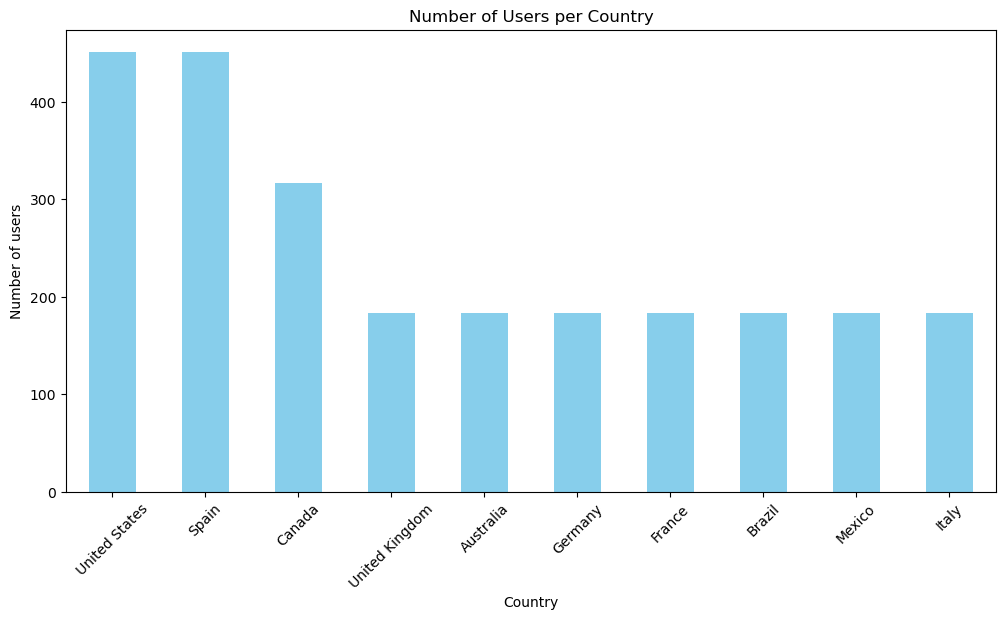

In [17]:
# 1. Number of users per country :

plt.figure(figsize=(12,6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

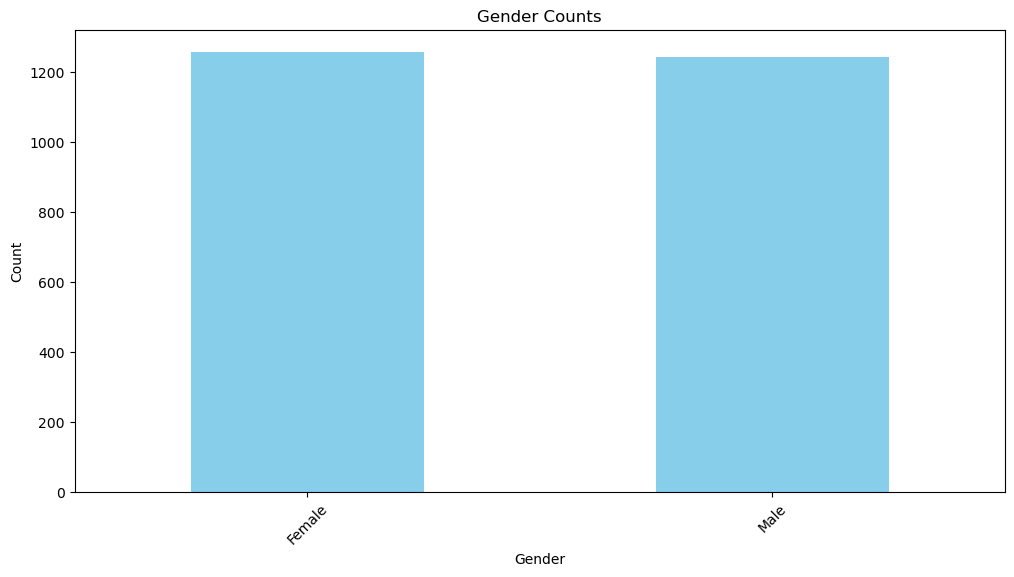

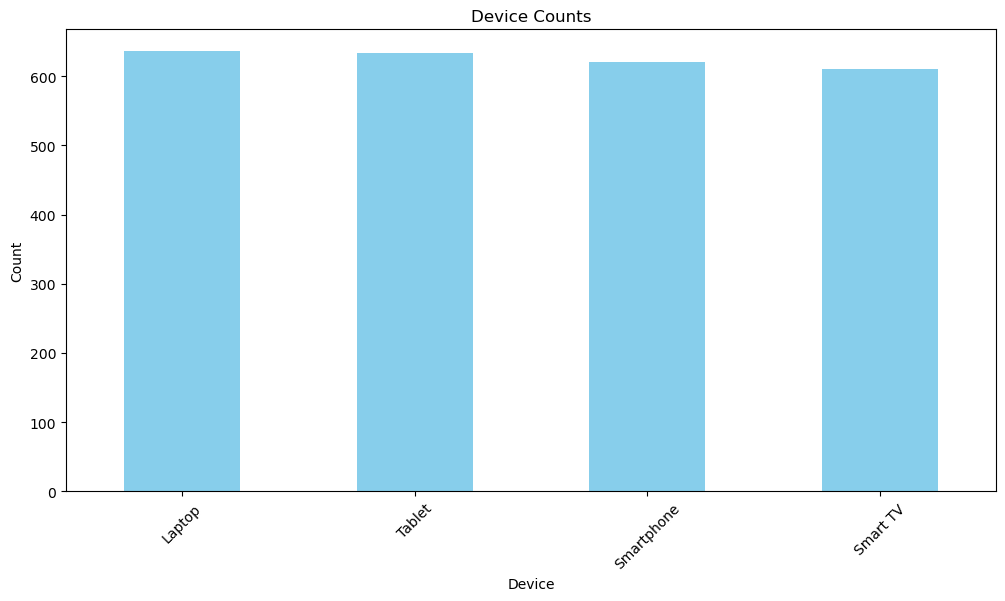

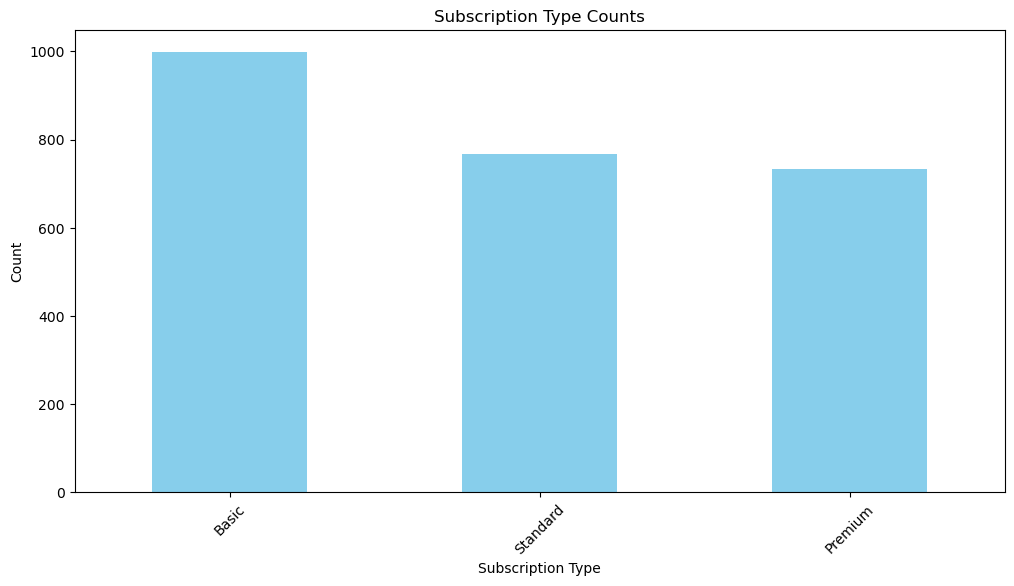

In [29]:
# 2. Gender, Device and Subscription Type Counts:

columns_titles = {

    'Gender' : 'Gender Counts',
    'Device' : 'Device Counts',
    'Subscription Type': 'Subscription Type Counts'

}

for column, title in columns_titles.items():
    plt.figure(figsize =(12,6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    

In [31]:
# Number of Users Per Country:


user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

import plotly.express as px

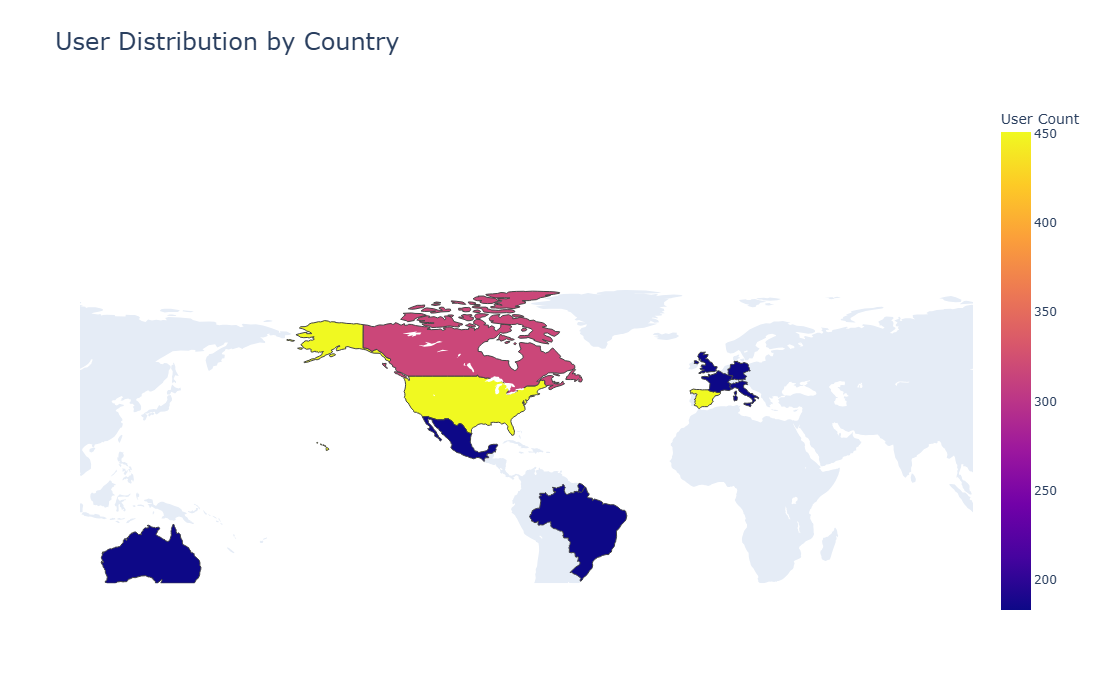

In [43]:
fig = px.choropleth(user_counts_by_country, locations='Country', locationmode='country names', color='User Count',
                    hover_name='Country', title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    width=1000,  # Adjust the width
    height=700, # Adjust the height
    title_font_size=24,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()

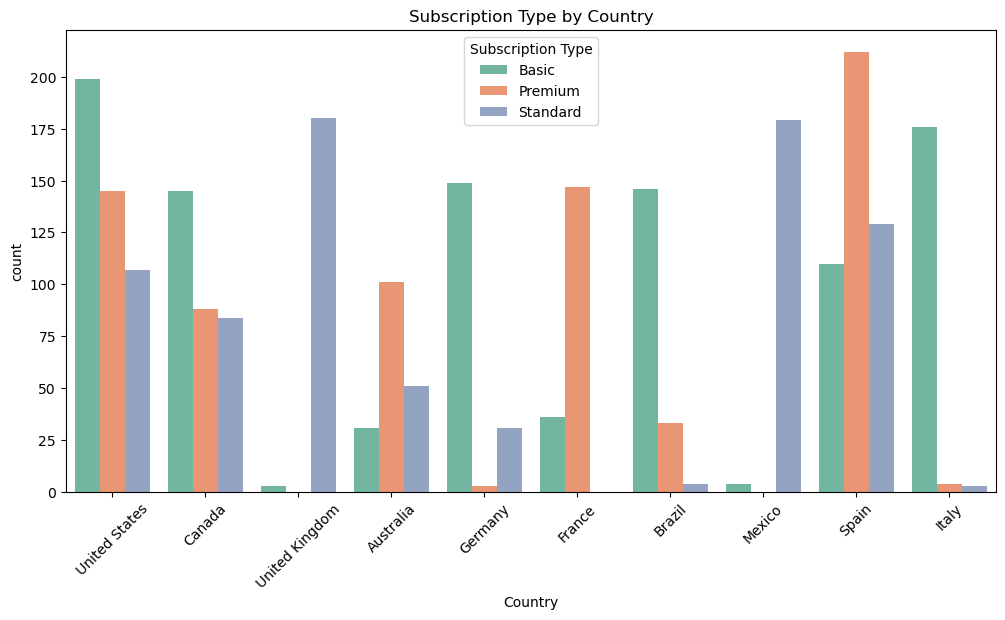

In [45]:
# Subscription Type by Country:

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()

In [73]:
subs_by_country = df.pivot_table(index='Country', columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0)

In [75]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [77]:
subs_by_country['Total'] = subs_by_country.sum(axis=1) 

In [79]:
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


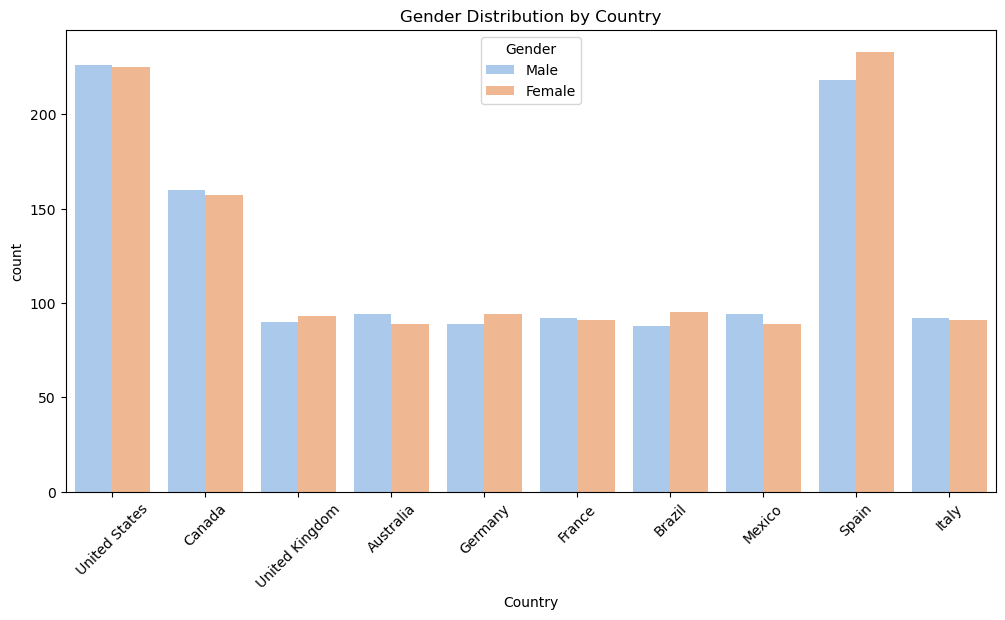

In [81]:
# Gender Distribution by Country:

plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [83]:
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)

In [85]:
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [89]:
subs_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type', 'Gender'],
                                        values='User ID', aggfunc='count', fill_value=0)

In [91]:
subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [95]:
subs_by_country_gender2 = df.pivot_table(index=['Country','Gender'], columns='Subscription Type',
                                        values='User ID', aggfunc='count', fill_value=0)

subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

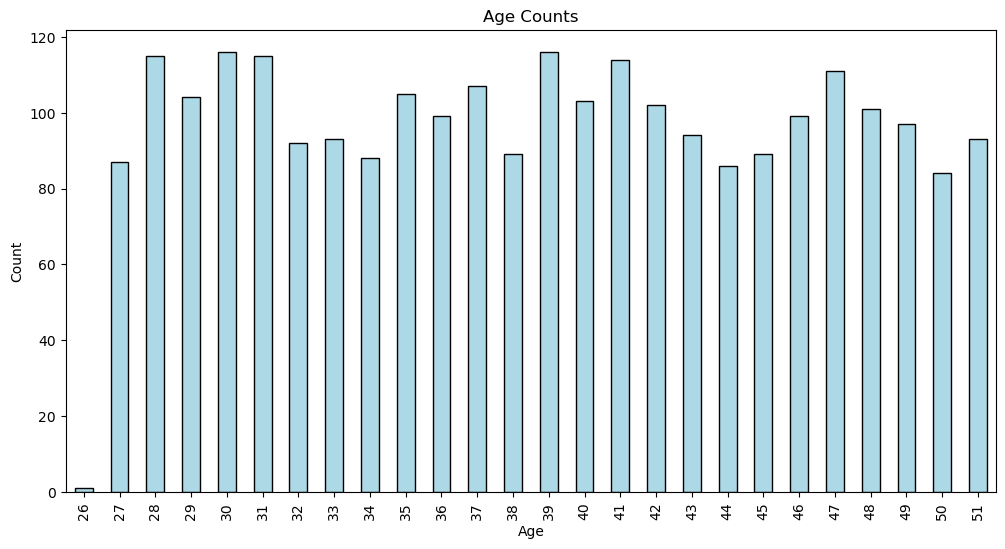

In [10]:
# Age Distribution:

plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [29]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [31]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [33]:
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x / 30))

In [37]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2


In [39]:
average_duration = df['Duration Months'].mean()

In [43]:
print(f"Average Duration: {average_duration}")

Average Duration: 10.7808


In [51]:
df['LTV'] = df['Monthly Revenue'] * df['Duration Months']     #LTV - Life Time Value.

In [53]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


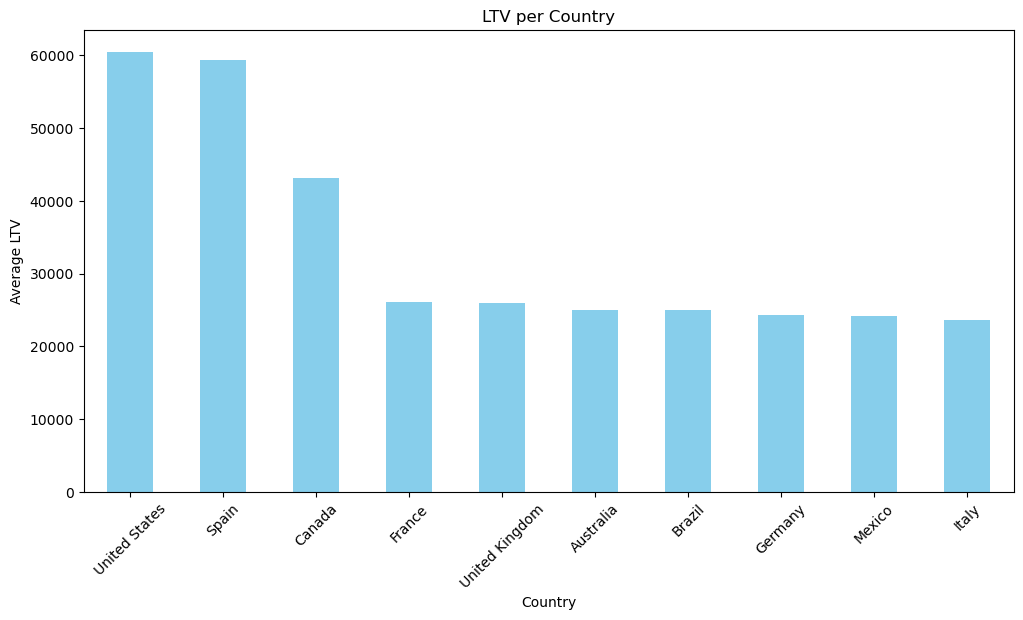

In [55]:
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

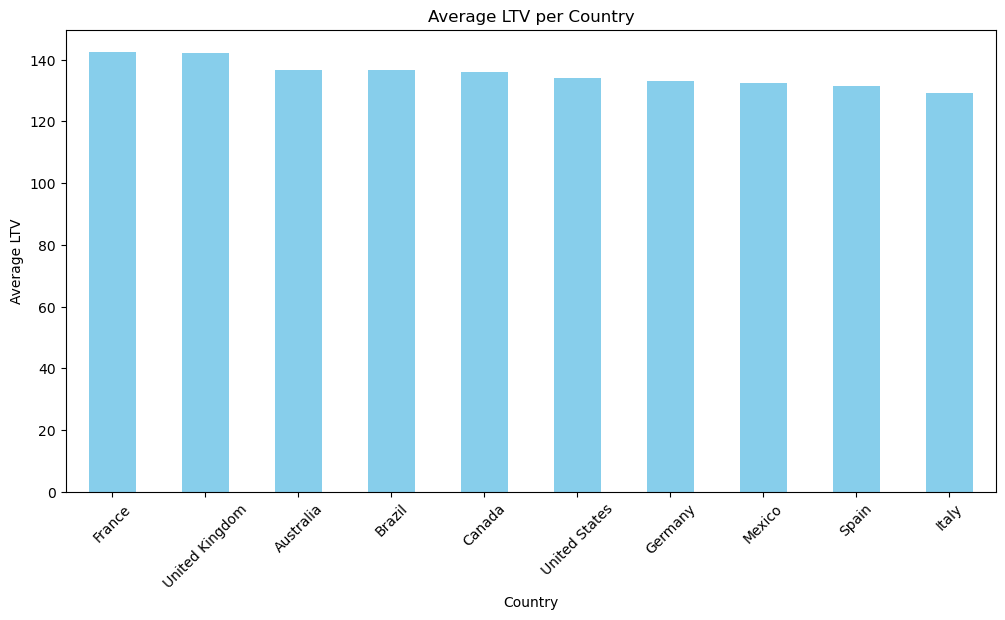

In [57]:
ltv_per_country = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country.plot(kind='bar', color='skyblue')
plt.title('Average LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

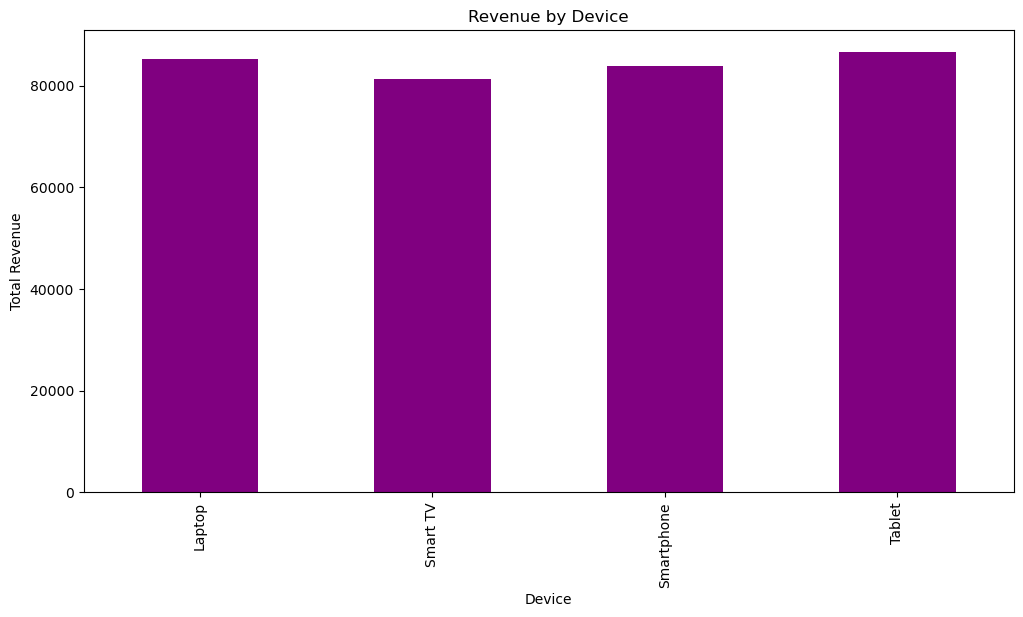

In [59]:
revenue_by_device =  df.groupby('Device')['LTV'].sum()

plt.figure(figsize=(12,6))
revenue_by_device.plot(kind='bar', color='purple')
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.show()

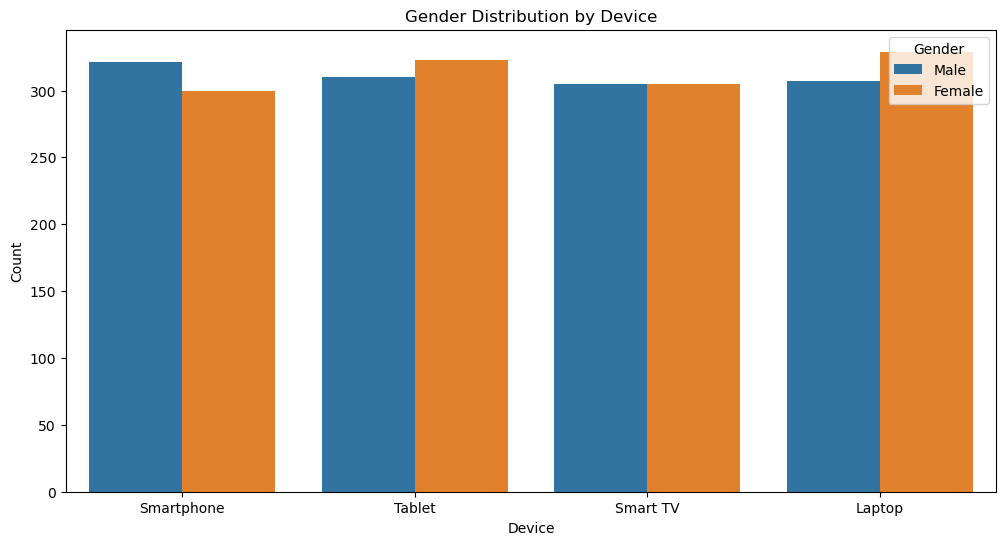

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Device', hue='Gender', data=df)
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

# Netflix Customer Base Analysis Summary Report

## **Objective**

The goal of this analysis is to understand the demographic and usage patterns of Netflix users, calculate key metrics such as Lifetime Value (LTV), and provide insights based on various attributes such as age, country, device usage, and subscription type

## **Data**

The dataset contains the following columns:

•	**User ID**: A unique identifier for each user.

•	**Subscription Type**: The type of subscription plan (Basic, Standard, Premium).

•	**Monthly Revenue**: The monthly revenue generated from each user.

•	**Join Date**: The date the user joined Netflix.

•	**Last Payment Date**: The date of the last payment made by the user.

•	**Country**: The country of the user.

•	**Age**: The age of the user.

•	**Gender**: The gender of the user.

•	**Device**: The primary device used by the user (Smartphone, Tablet, Smart TV, Laptop).

•	**Plan Duration**: The duration of t


## **Metrics and Analyses**
**
 **Number of Users per Country**

The highest number of users are from the United States and Spain, each with 451 users, making up 18.04% of the total user base each. Following these are Canada with 317 users (12.68%), and the United Kingdom with 183 users (7.32%). Australia, Germany, France, Brazil, Mexico, and Italy each have the same number of users, 183, accounting for 7.32% of the total user base per coun

**2.	Gender Counts**

The overall gender distribution among users is almost equal, with 1257 female users (50.28%) and 1243 male users (49.72%).

The gender distribution is almost equal across all countries, with a nearly balanced ratio of female and male users in each country. For example, in the United States, the distribution is 49.89% female and 50.11% male, and in Spain, it is 51.66% female and 48.34% male, reflecting a similar balance in other countries as w

**3.	Device Counts**

The distribution of devices among users is relatively balanced. The breakdown is as follows:

- Laptops are used by 636 users (25.44%).
- Tablets are used by 633 users (25.32%).
- Smartphones are used by 621 users (24.84%).
- Smart TVs are used by 610 users (2


**4.	Subscription Type Counts**

The distribution of subscription types among users is as follows:

- **Basic:** 999 users (39.96%)
- **Standard:** 768 users (30.72%)
- **Premium:** 733 users (2


**5.	Age Distribution**

The age distribution of users shows the following statistics:

•	**Mean Age:** 38.8 years

•	**Median Age:** 39.0 years

•	**Minimum Age:** 26 years

•	**Maximum Age:** 51 years

•	**Standard Deviation:** 7.17 years

•	Most Common Ages:

•	30 years: 116 users

•	3


**6.	Duration Between Join Date and Last Payment Date**

The duration between the join date and the last payment date among users shows the following statistics:

•	**Mean Duration:** 308.6 days

•	**Median Duration:** 307.0 days

•	**Minimum Duration:** 8 days

•	**Maximum Duration:*


**7.	Lifetime Value (LTV)**

The highest total LTV is in the United States, with an LTV of 60,445, accounting for 18.91% of the overall LTV. This is because the United States has the highest number of users. Similarly, Spain has a high total LTV of 59,269 (18.54% of the overall LTV) due to its large user base. Other countries, such as Canada and France, have total LTVs of 43,116 (13.48%) and 26,080 (8.16%) respectively. The total LTVs for the remaining countries, including Australia, Brazil, Germany, Italy, Mexico, and the United Kingdom, range between 23,618 and 25,990, each contributing between 7.38% and 7.84% to the overall LT

The average Lifetime Value (LTV) per user varies across different countries. France has the highest average LTV at 142.51, followed closely by the United Kingdom at 142.02. Other countries with relatively high average LTVs include Australia (136.73), Brazil (136.50), and Canada (136.01). The United States, despite having the highest total LTV due to its large user base, has an average LTV of 134.02.

Countries like Germany (133.05), Mexico (132.39), and Spain (131.42) have average LTVs that are slightly lower, while Italy has the lowest average LTV at 129.06.

This analysis highlights that while the United States and Spain have high total LTVs due to their large user bases, countries like France and the United Kingdom lead in terms of average LTV per user.V.* 655 days9 years: 116 users9.32%)4.40%).ell.try.he subscription plan.s.
